**Data Description:**
* Train: Contains the coupons offered to the given customers under 18 campaigns.
* Campaign Data: Campaign info for each of the 18 campaigns present in the train data.
* Coupon item mapping: Mapping of coupon and items valid for discount under that
coupon.
* Customer demographics: Transaction data for all customers for the duration of
campaigns in the train data.
* Item Data: Item info for each item sold by retailer.


### Import helpful libraries and packages 

In [1]:
import pandas as pd  # data processing
import numpy as np   # linear algebra
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
encoder = LabelEncoder()

### Import Data : CSV file I/O (e.g. pd.read_csv) 

### As test.csv is missing in dataset. I am splitting train data into train and test dataset.

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train_data, test_data = train_test_split(train, test_size=0.2, random_state=42)
print(f"Rows in train_data: {len(train_data)}\nRows in test_data: {len(test_data)}\n")

Rows in train_data: 62695
Rows in test_data: 15674



In [4]:
train_data.shape

(62695, 5)

In [5]:
test_data.shape

(15674, 5)

In [6]:
df_train = train_data
df_train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
33752,55309,8,727,316,0
59685,98055,13,172,1052,0
55005,90411,13,692,668,0
37692,61880,8,1015,60,0
58490,96107,8,76,1546,0


In [7]:
df_test = test_data
df_test.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
58231,95681,8,711,421,0
39245,64423,26,739,303,0
57587,94649,30,683,378,0
6702,11135,8,920,42,0
10153,16742,8,68,1146,0


In [8]:
df_cam_data = pd.read_csv('campaign_data.csv')
df_cam_data.head(5)

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [9]:
df_coup_item = pd.read_csv('coupon_item_mapping.csv')
df_coup_item.head(5)

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [10]:
df_customer_demo = pd.read_csv('customer_demographics.csv')
df_customer_demo.head(5)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [11]:
df_customer_tran = pd.read_csv('customer_transaction_data.csv')
df_customer_tran.head(5)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [12]:
df_item = pd.read_csv('item_data.csv')
df_item.head(5)

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [13]:
df_cam_data.shape, df_coup_item.shape ,df_customer_demo.shape ,df_customer_tran.shape ,df_item.shape ,df_train.shape 

((28, 4), (92663, 2), (760, 7), (1324566, 7), (74066, 4), (62695, 5))

**Data view**

In [14]:
print('Train DataFrame')
df_train.isnull().sum()

Train DataFrame


id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
dtype: int64

In [15]:
print('Test DateFrame')
df_test.isnull().sum()

Test DateFrame


id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
dtype: int64

In [16]:
print('Campaign DataFrame')
df_cam_data.isnull().sum()

Campaign DataFrame


campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64

In [17]:
print('Coupon DataFrame')
df_coup_item.isnull().sum()

Coupon DataFrame


coupon_id    0
item_id      0
dtype: int64

In [18]:
print('Customer Demographics DataFrame')
df_customer_demo.isnull().sum()

Customer Demographics DataFrame


customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64

In [19]:
print('Customer Transcation DataFrame')
df_customer_tran.isnull().sum()

Customer Transcation DataFrame


date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
dtype: int64

In [20]:
print('Item DataFrame')
df_item.isnull().sum()

Item DataFrame


item_id       0
brand         0
brand_type    0
category      0
dtype: int64

In [21]:
df_train.redemption_status.value_counts(normalize=True)*100

0    99.035011
1     0.964989
Name: redemption_status, dtype: float64

Text(0, 0.5, 'redemption_status')

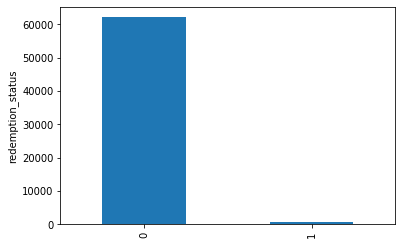

In [22]:
value=df_train['redemption_status'].value_counts().plot(kind='bar')
plt.ylabel('redemption_status')

### The dataset is highly imbalanced. 

## Data cleaning and formatting.


In [23]:
df_customer_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [24]:
df_customer_demo.marital_status.value_counts()

Married    317
Single     114
Name: marital_status, dtype: int64

In [25]:
df_customer_demo.family_size.value_counts()

2     303
1     248
3     104
5+     57
4      48
Name: family_size, dtype: int64

In [26]:
df_customer_demo.no_of_children.value_counts()

1     107
3+     60
2      55
Name: no_of_children, dtype: int64

In [27]:
df_customer_demo.age_range.value_counts()

46-55    271
36-45    187
26-35    130
70+       68
56-70     59
18-25     45
Name: age_range, dtype: int64

#### The below lines of code is to get rid of the + and keeping 5+ as 5 and 3+ as 3 and converting the columns to int data type.
- use the apply() function to apply the lambda function to both rows and columns of a dataframe
- The sub() function replaces the matches with the text of your choice

In [28]:
df_customer_demo['family_size'] = df_customer_demo.family_size.apply(lambda x: int(re.sub('\+','',x)))
df_customer_demo['no_of_children'] = df_customer_demo.no_of_children.apply(lambda x: int(re.sub('\+','',x)) if pd.notna(x) else x)


#### Filling NaN values for marital_status


In [29]:
#customers with family size =1 will be single
df_customer_demo.loc[pd.isnull(df_customer_demo.marital_status) 
                     & (df_customer_demo.family_size == 1),'marital_status'] = 'Single'
#customers whos family size - no of childrens == 1, will also be single 
df_customer_demo.loc[(df_customer_demo.family_size - df_customer_demo.no_of_children == 1) 
                     & pd.isnull(df_customer_demo.marital_status),'marital_status'] = 'Single'

In [30]:
#Married (see the below cell) and hence where ever the difference is 2 and marital status is NaN and No of Children is NaN we impute the Mariatl Status with Married
df_customer_demo.loc[(pd.isnull(df_customer_demo.marital_status)) 
                     & ((df_customer_demo.family_size - df_customer_demo.no_of_children) == 2) & (pd.notnull(df_customer_demo.no_of_children)),'marital_status'] = 'Married'

In [31]:
#original data shows customers with fam size == 2, and NaN in no of childrens are majorly Married 
df_customer_demo.loc[pd.isnull(df_customer_demo.marital_status) & (pd.isnull(df_customer_demo.no_of_children)) 
              & (df_customer_demo.family_size ==2),'marital_status'] = 'Married'

In [32]:
a = df_customer_demo.marital_status.groupby((df_customer_demo.family_size - df_customer_demo.no_of_children) == 2).value_counts()
print(a[True])

marital_status
Married    186
Single      10
Name: marital_status, dtype: int64


In [33]:
b = df_customer_demo.marital_status.groupby((df_customer_demo.family_size) == 2 & pd.isnull(df_customer_demo.no_of_children)).value_counts()
print(b[True])

310


In [34]:
df_customer_demo.marital_status.isnull().sum()

0

#### Filling NaN values for no of children


In [35]:
#Married people with family_size ==2 will have 0 childrens
df_customer_demo.loc[pd.isnull(df_customer_demo.no_of_children) & (df_customer_demo.marital_status == 'Married') 
                     & (df_customer_demo.family_size == 2),'no_of_children'] = 0
#customers with family size 1 will have zero childrens
df_customer_demo.loc[pd.isnull(df_customer_demo.no_of_children) & (df_customer_demo.family_size == 1), 'no_of_children'] = 0

In [36]:
#singles with family size == 2, will probably have 1 child
df_customer_demo.loc[pd.isnull(df_customer_demo.no_of_children) & (df_customer_demo.family_size == 2),'no_of_children'] = 1

In [37]:
df_customer_demo['no_of_children']=df_customer_demo['no_of_children'].astype(np.int64)

In [38]:
df_customer_demo.no_of_children.isnull().sum()

0

In [39]:
df_customer_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  760 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    int64 
 5   no_of_children  760 non-null    int64 
 6   income_bracket  760 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 41.7+ KB


#### age_range

In [40]:
#Label Encoding Marital Status --- 0 is Single and 1 is Married
df_customer_demo["marital_status"] = encoder.fit_transform(df_customer_demo["marital_status"])
# Label Encoding age_range ... 18-25 is 0, 26-35 is 1, 36-45 is 2, 46-55 is 3, 56-70 is 4 and 70+ is 5
df_customer_demo["age_range"] = encoder.fit_transform(df_customer_demo["age_range"])

In [41]:
df_customer_demo.head(10)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,5,0,0,2,0,4
1,6,3,0,0,2,0,5
2,7,1,0,0,3,1,3
3,8,1,0,0,4,2,6
4,10,3,1,0,1,0,5
5,11,5,1,0,2,1,1
6,12,3,0,0,2,0,7
7,13,2,1,0,1,0,2
8,14,1,0,1,2,0,6
9,15,3,0,0,2,0,6


### Dealing with Campaign Dataframe

In [42]:
df_cam_data.head(2)

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13


In [43]:
df_cam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [44]:
df_cam_data.campaign_type.value_counts()

Y    22
X     6
Name: campaign_type, dtype: int64

In [45]:
#Label Encoding Campaign type
df_cam_data["campaign_type"] = encoder.fit_transform(df_cam_data.campaign_type)

In [46]:
#Converting the date columns to date time
df_cam_data['start_date'] = pd.to_datetime(df_cam_data['start_date'], format = '%d/%m/%y')
df_cam_data['end_date'] = pd.to_datetime(df_cam_data['end_date'], format = '%d/%m/%y')

In [47]:
#Creating a new column campaign_duration
df_cam_data["campaign_duration"] = df_cam_data["end_date"] - df_cam_data["start_date"]
df_cam_data["campaign_duration"] = df_cam_data["campaign_duration"].apply(lambda x: x.days) 

In [48]:
df_cam_data.head(5)

,campaign_id,campaign_type,start_date,end_date,campaign_duration
0,24,1,2013-10-21,2013-12-20,60
1,25,1,2013-10-21,2013-11-22,32
2,20,1,2013-09-07,2013-11-16,70
3,23,1,2013-10-08,2013-11-15,38
4,21,1,2013-09-16,2013-10-18,32


### Dealing with Customer Transaction Dataframe

In [49]:
df_customer_tran.head(2)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0


In [50]:
df_customer_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [51]:
#converting the date column into date time (this method can remove one or more levels.)
df_customer_tran['date'] = pd.to_datetime(df_customer_tran['date'])
df_customer_tran = df_customer_tran.sort_values('date').reset_index(drop=True)

In [52]:
df_customer_tran.head(2)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.00
1,2012-01-02,464,20697,1,92.26,-21.37,-35.62


In [53]:
#Creating 3 new columns from the date column
df_customer_tran['day'] = df_customer_tran['date'].apply(lambda x : x.day)
df_customer_tran['weekday'] = df_customer_tran['date'].apply(lambda x : x.weekday())
df_customer_tran['month'] = df_customer_tran['date'].apply(lambda x : x.month)

In [54]:
df_customer_tran.head(5)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day,weekday,month
0,2012-01-02,1501,26830,1,35.26,-10.69,0.00,2,0,1
1,2012-01-02,464,20697,1,92.26,-21.37,-35.62,2,0,1
2,2012-01-02,464,20717,2,28.50,-27.78,0.00,2,0,1
3,2012-01-02,464,21008,1,35.26,-17.81,0.00,2,0,1
4,2012-01-02,464,22243,2,118.97,-22.80,0.00,2,0,1


In [55]:
# Given selling_price and other_discount are for the entire transaction. Hence getting the Actual value of the transaction.
df_customer_tran.selling_price = df_customer_tran.selling_price/df_customer_tran.quantity
df_customer_tran.other_discount = df_customer_tran.other_discount/df_customer_tran.quantity
df_customer_tran.selling_price = df_customer_tran.selling_price - df_customer_tran.other_discount

In [56]:
#Inserting a new column to know if the coupon was used or not
df_customer_tran['coupon_used'] = df_customer_tran.coupon_discount.apply(lambda x: 1 if x !=0 else 0)

In [57]:
df_customer_tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day,weekday,month,coupon_used
0,2012-01-02,1501,26830,1,45.950,-10.69,0.00,2,0,1,0
1,2012-01-02,464,20697,1,113.630,-21.37,-35.62,2,0,1,1
2,2012-01-02,464,20717,2,28.140,-13.89,0.00,2,0,1,0
3,2012-01-02,464,21008,1,53.070,-17.81,0.00,2,0,1,0
4,2012-01-02,464,22243,2,70.885,-11.40,0.00,2,0,1,0


### Dealing with Items Dataframe

In [58]:
df_item.head(2)

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous


In [59]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [60]:
df_item.brand_type.value_counts()

Established    62842
Local          11224
Name: brand_type, dtype: int64

In [61]:
df_item.category.value_counts()

Grocery                   32448
Pharmaceutical            24471
Natural Products           2533
Dairy, Juices & Snacks     2425
Skin & Hair Care           2244
Meat                       2080
Packaged Meat              1966
Prepared Food              1880
Bakery                     1679
Seafood                     728
Flowers & Plants            664
Miscellaneous               385
Alcohol                     303
Garden                      102
Restauarant                  78
Salads                       40
Travel                       19
Fuel                         14
Vegetables (cut)              7
Name: category, dtype: int64

In [62]:
#Label Encoding the brand_type and category columns
df_item.brand_type = encoder.fit_transform(df_item["brand_type"])
df_item.category = encoder.fit_transform(df_item["category"])

In [63]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   item_id     74066 non-null  int64
 1   brand       74066 non-null  int64
 2   brand_type  74066 non-null  int32
 3   category    74066 non-null  int32
dtypes: int32(2), int64(2)
memory usage: 1.7 MB


In [64]:
df_item.head(5)

,item_id,brand,brand_type,category
0,1,1,0,6
1,2,1,0,8
2,3,56,1,1
3,4,56,1,6
4,5,56,1,6


### Dealing with Coupon Dataframe

In [65]:
df_coup_item.head(2)

,coupon_id,item_id
0,105,37
1,107,75


## Data merging and wrangling.
- Data wrangling involves processing the data in various formats like - merging, grouping, concatenating etc. for the purpose of analysing or getting them ready to be used with another set of data. Python has built-in features to apply these wrangling methods to various data sets to achieve the analytical goal.(reference : google)



**1. Merge coupon item data and items data on item_id**

In [66]:
df_coup_item = pd.merge(df_coup_item, df_item, on="item_id", how="left")

In [67]:
df_coup_item.head(5)

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,1,6
1,107,75,56,1,6
2,494,76,209,0,6
3,522,77,278,0,6
4,518,77,278,0,6


**2. Aggregate transactions by item_id**

In [68]:
df_customer_tran.head(2)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day,weekday,month,coupon_used
0,2012-01-02,1501,26830,1,45.95,-10.69,0.00,2,0,1,0
1,2012-01-02,464,20697,1,113.63,-21.37,-35.62,2,0,1,1


**pivot_table even allows you to deal with the missing values through the parameters dropna and fill_value:**

- dropna allows you to drop the null values in the grouped table whose all values are null
- fill_value parameter can be used to replace the NaN values in the grouped table with the values that you provide here

In [69]:
# Aggregate transactions by item_id by mean for a particular customer
transactions1 = pd.pivot_table(df_customer_tran, index = "item_id", 
               values=['customer_id','quantity','selling_price', 'other_discount','coupon_discount','coupon_used'],
               aggfunc={'customer_id':lambda x: len(set(x)),
                        'quantity':np.mean,
                        'selling_price':np.mean,
                        'other_discount':np.mean,
                        'coupon_discount':np.mean,
                        'coupon_used': np.sum
                        } )
transactions1.reset_index(inplace=True)
transactions1.rename(columns={'customer_id': 'no_of_customers'}, inplace=True)

In [70]:
transactions1.head(5)

,item_id,coupon_discount,coupon_used,no_of_customers,other_discount,quantity,selling_price
0,1,0.0,0,2,0.0,1.0,124.31
1,2,0.0,0,1,0.0,1.0,35.26
2,3,0.0,0,1,0.0,1.0,56.64
3,4,0.0,0,1,0.0,1.0,54.85
4,5,0.0,0,1,0.0,1.0,81.57


In [71]:
# Aggregate transactions by item_id by sum for a particular customer
transactions2 = pd.pivot_table(df_customer_tran, index = "item_id", 
               values=['customer_id','quantity','selling_price', 'other_discount','coupon_discount'],
               aggfunc={'customer_id':len,
                        'quantity':np.sum,
                        'selling_price':np.sum,
                        'other_discount':np.sum,
                        'coupon_discount':np.sum,
                        } )
transactions2.reset_index(inplace=True)
transactions2.rename(columns={'customer_id': 'total_counts', 'quantity':'quantity_sum',
                             'selling_price':'price_sum', 'other_discount':'other_sum',
                             'coupon_discount':'coup_sum'}, inplace=True)

In [72]:
transactions2.head(5)

,item_id,coup_sum,total_counts,other_sum,quantity_sum,price_sum
0,1,0.0,2,0.0,2,248.62
1,2,0.0,1,0.0,1,35.26
2,3,0.0,1,0.0,1,56.64
3,4,0.0,1,0.0,1,54.85
4,5,0.0,1,0.0,1,81.57


In [73]:
transactions1 = pd.merge(transactions1, transactions2, on='item_id',how='left' )

In [74]:
transactions1.head(2)

,item_id,coupon_discount,coupon_used,no_of_customers,other_discount,quantity,selling_price,coup_sum,total_counts,other_sum,quantity_sum,price_sum
0,1,0.0,0,2,0.0,1.0,124.31,0.0,2,0.0,2,248.62
1,2,0.0,0,1,0.0,1.0,35.26,0.0,1,0.0,1,35.26


In [75]:
transactions1['total_discount_mean'] = transactions1['coupon_discount'] + transactions1['other_discount']
transactions1['total_discount_sum'] = transactions1['other_sum'] + transactions1['coup_sum']
transactions1.head()


,item_id,coupon_discount,coupon_used,no_of_customers,other_discount,quantity,selling_price,coup_sum,total_counts,other_sum,quantity_sum,price_sum,total_discount_mean,total_discount_sum
0,1,0.0,0,2,0.0,1.0,124.31,0.0,2,0.0,2,248.62,0.0,0.0
1,2,0.0,0,1,0.0,1.0,35.26,0.0,1,0.0,1,35.26,0.0,0.0
2,3,0.0,0,1,0.0,1.0,56.64,0.0,1,0.0,1,56.64,0.0,0.0
3,4,0.0,0,1,0.0,1.0,54.85,0.0,1,0.0,1,54.85,0.0,0.0
4,5,0.0,0,1,0.0,1.0,81.57,0.0,1,0.0,1,81.57,0.0,0.0


**3. Merge 1 and 2 on item_id**

In [76]:
item_coupon_trans = pd.merge(df_coup_item, transactions1, on='item_id', how='left')

In [77]:
item_coupon_trans.head(5)

,coupon_id,item_id,brand,brand_type,category,coupon_discount,coupon_used,no_of_customers,other_discount,quantity,selling_price,coup_sum,total_counts,other_sum,quantity_sum,price_sum,total_discount_mean,total_discount_sum
0,105,37,56,1,6,0.0,0.0,2.0,-8.108333,2.285714,57.247381,0.0,7.0,-56.758333,16.0,400.731667,-8.108333,-56.758333
1,107,75,56,1,6,0.0,0.0,4.0,-2.633712,1.363636,38.828485,0.0,33.0,-86.912500,45.0,1281.340000,-2.633712,-86.912500
2,494,76,209,0,6,0.0,0.0,1.0,-17.450000,1.000000,106.500000,0.0,1.0,-17.450000,1.0,106.500000,-17.450000,-17.450000
3,522,77,278,0,6,0.0,0.0,2.0,-16.920000,1.000000,87.270000,0.0,2.0,-33.840000,2.0,174.540000,-16.920000,-33.840000
4,518,77,278,0,6,0.0,0.0,2.0,-16.920000,1.000000,87.270000,0.0,2.0,-33.840000,2.0,174.540000,-16.920000,-33.840000


In [78]:
item_coupon_trans.columns

Index(['coupon_id', 'item_id', 'brand', 'brand_type', 'category',
       'coupon_discount', 'coupon_used', 'no_of_customers', 'other_discount',
       'quantity', 'selling_price', 'coup_sum', 'total_counts', 'other_sum',
       'quantity_sum', 'price_sum', 'total_discount_mean',
       'total_discount_sum'],
      dtype='object')

**4. Aggregate 3 on coupon_id**

In [79]:
df_coup_item = pd.pivot_table(item_coupon_trans, index ="coupon_id",
                         values=[ 'item_id', 'brand', 'brand_type', 'category',
       'coupon_discount', 'coupon_used', 'no_of_customers', 'other_discount',
       'quantity', 'selling_price', 'coup_sum', 'total_counts', 'other_sum', 'quantity_sum',
       'price_sum', 'total_discount_mean', 'total_discount_sum'],
                       aggfunc={'item_id':lambda x: len(set(x)),
                       'brand':lambda x: mode(x)[0][0],
                       'brand_type':lambda x: mode(x)[0][0],
                       'category':lambda x: mode(x)[0][0],
                       'coupon_discount':np.mean,
                       'no_of_customers':np.mean,
                       'other_discount':np.mean,
                       'quantity':np.mean,
                       'selling_price':np.mean,
                      'coupon_used': np.sum,
                       'coup_sum': np.sum,
                       'total_counts': np.sum,
                       'other_sum': np.sum,
                       'quantity_sum': np.sum,
                       'price_sum': np.sum,
                       'total_discount_mean': np.mean,
                       'total_discount_sum': np.sum
                      })
df_coup_item.reset_index(inplace=True) 

In [80]:
df_coup_item.rename(columns={'item_id':'item_counts'}, inplace=True)

In [81]:
df_coup_item.head()

,coupon_id,brand,brand_type,category,coup_sum,coupon_discount,coupon_used,item_counts,no_of_customers,other_discount,other_sum,price_sum,quantity,quantity_sum,selling_price,total_counts,total_discount_mean,total_discount_sum
0,1,1475,0,9,-1526.31,-1.321524,35.0,39,14.794872,-16.620713,-18780.020833,89796.868333,1.221644,1034.0,101.183245,826.0,-17.942237,-20306.330833
1,2,2084,0,6,0.00,0.000000,0.0,2,15.000000,-21.343885,-1163.521667,8940.520000,1.137500,103.0,122.534500,81.0,-21.343885,-1163.521667
2,3,278,0,6,-578.81,-2.747358,15.0,17,8.588235,-14.728021,-4055.343333,27756.490000,1.121525,248.0,131.655894,212.0,-17.475379,-4634.153333
3,4,544,0,6,-881.59,-1.485152,44.0,24,22.333333,-36.718597,-25895.740000,142874.023333,1.020872,702.0,211.708369,676.0,-38.203749,-26777.330000
4,5,5357,0,11,0.00,0.000000,0.0,7,6.000000,-27.265786,-1228.880000,16636.570000,1.000000,44.0,403.970000,44.0,-27.265786,-1228.880000


**5. Aggregate transactions on customer_id**

In [82]:
# Aggregate transactions by customer_id
transactions3 = pd.pivot_table(df_customer_tran, index = "customer_id", 
               values=['item_id','quantity','selling_price', 'other_discount','coupon_discount','coupon_used','day','weekday','month'],
               aggfunc={'item_id':lambda x: len(set(x)),
                        'quantity':np.mean,
                        'selling_price':np.mean,
                        'other_discount':np.mean,
                        'coupon_discount':np.mean,
                        'coupon_used': np.sum,
                        'day':lambda x: mode(x)[0][0],
                        'weekday':lambda x: mode(x)[0][0],
                        'month':lambda x: mode(x)[0][0]}
              )
transactions3.reset_index(inplace=True)
transactions3.rename(columns={'item_id': 'no_of_items'}, inplace=True)
transactions3.head()

,customer_id,coupon_discount,coupon_used,day,no_of_items,month,other_discount,quantity,selling_price,weekday
0,1,-2.019876,78,3,463,5,-12.837537,1.170802,97.470480,3
1,2,-0.595084,4,13,352,6,-13.432195,1.131265,107.805783,5
2,3,-3.091546,53,16,406,7,-14.074853,11.578723,85.082452,4
3,4,-0.404773,1,14,125,5,-8.883656,1.272727,138.256770,5
4,5,-0.114684,2,11,490,5,-11.260696,117.869949,115.482842,1


In [83]:
# Aggregate transactions by customer_id by sum
transactions4 = pd.pivot_table(df_customer_tran, index = "customer_id", 
               values=['item_id','quantity','selling_price', 'other_discount','coupon_discount'],
               aggfunc={'item_id':len,
                        'quantity':np.sum,
                        'selling_price':np.sum,
                        'other_discount':np.sum,
                        'coupon_discount':np.sum}
              )
transactions4.reset_index(inplace=True)
transactions4.rename(columns={'item_id': 'customer_id_count','quantity':'quan_sum','selling_price':'sell_price_sum',
                             'other_discount':'odd_sum','coupon_discount':'coup_dis_sum'  }, inplace=True)
transactions4.head()

,customer_id,coup_dis_sum,customer_id_count,odd_sum,quan_sum,sell_price_sum
0,1,-2116.83,1048,-13453.738833,1227,102149.063000
1,2,-249.34,419,-5628.089833,474,45170.623167
2,3,-2179.54,705,-9922.771654,8163,59983.128347
3,4,-89.05,220,-1954.404333,280,30416.489333
4,5,-90.83,792,-8918.471477,93353,91462.410620


In [84]:
transactions = pd.merge(transactions3, transactions4, on='customer_id', how='left')
transactions.head()


,customer_id,coupon_discount,coupon_used,day,no_of_items,month,other_discount,quantity,selling_price,weekday,coup_dis_sum,customer_id_count,odd_sum,quan_sum,sell_price_sum
0,1,-2.019876,78,3,463,5,-12.837537,1.170802,97.470480,3,-2116.83,1048,-13453.738833,1227,102149.063000
1,2,-0.595084,4,13,352,6,-13.432195,1.131265,107.805783,5,-249.34,419,-5628.089833,474,45170.623167
2,3,-3.091546,53,16,406,7,-14.074853,11.578723,85.082452,4,-2179.54,705,-9922.771654,8163,59983.128347
3,4,-0.404773,1,14,125,5,-8.883656,1.272727,138.256770,5,-89.05,220,-1954.404333,280,30416.489333
4,5,-0.114684,2,11,490,5,-11.260696,117.869949,115.482842,1,-90.83,792,-8918.471477,93353,91462.410620


**6. Merge 4 and train on coupon_id**

**7. Merge 5 with campaign data on campaign_id**

**8. Merge 7 with customer demographic data on customer_id**

**9. Merge 6 with 8 on customer_id respectively**


In [85]:
def merge_all(df): 
    df =  pd.merge(df, df_coup_item, on="coupon_id", how="left")
    df = pd.merge(df, df_cam_data, on="campaign_id", how="left")
    df = pd.merge(df, df_customer_demo, on="customer_id", how="left")
    df = pd.merge(df, transactions, on="customer_id", how="left")
    return df

In [86]:
train = merge_all(df_train)
test = merge_all(df_test)

In [87]:
train.shape

(62695, 46)

In [88]:
test.shape

(15674, 46)

## Data is Ready here, But we need to check for Null Values which could have been created while merging.

In [89]:
train.isnull().sum()

id                         0
campaign_id                0
coupon_id                  0
customer_id                0
redemption_status          0
brand                      0
brand_type                 0
category                   0
coup_sum                   0
coupon_discount_x          0
coupon_used_x              0
item_counts                0
no_of_customers            0
other_discount_x           0
other_sum                  0
price_sum                  0
quantity_x                 0
quantity_sum               0
selling_price_x            0
total_counts               0
total_discount_mean        0
total_discount_sum         0
campaign_type              0
start_date                 0
end_date                   0
campaign_duration          0
age_range              27745
marital_status         27745
rented                 27745
family_size            27745
no_of_children         27745
income_bracket         27745
coupon_discount_y          0
coupon_used_y              0
day           

In [90]:
test.isnull().sum()

id                        0
campaign_id               0
coupon_id                 0
customer_id               0
redemption_status         0
brand                     0
brand_type                0
category                  0
coup_sum                  0
coupon_discount_x         0
coupon_used_x             0
item_counts               0
no_of_customers           0
other_discount_x          0
other_sum                 0
price_sum                 0
quantity_x                0
quantity_sum              0
selling_price_x           0
total_counts              0
total_discount_mean       0
total_discount_sum        0
campaign_type             0
start_date                0
end_date                  0
campaign_duration         0
age_range              6963
marital_status         6963
rented                 6963
family_size            6963
no_of_children         6963
income_bracket         6963
coupon_discount_y         0
coupon_used_y             0
day                       0
no_of_items         

**Observation**

There are missing values in:

- age_range
- marital_status
- rented
- family_size
- no_of_children
- income_brac

**As all of these columns are present in cust_demo dataframe, filling the NaN's with the mode.**

In [91]:
def deal_na(df):
    for col in df_customer_demo.columns.tolist()[1:]:
        df[col].fillna(mode(df[col]).mode[0], inplace=True)
    return df


train = deal_na(train)
test = deal_na(test)

In [92]:
train.isnull().sum()

id                     0
campaign_id            0
coupon_id              0
customer_id            0
redemption_status      0
brand                  0
brand_type             0
category               0
coup_sum               0
coupon_discount_x      0
coupon_used_x          0
item_counts            0
no_of_customers        0
other_discount_x       0
other_sum              0
price_sum              0
quantity_x             0
quantity_sum           0
selling_price_x        0
total_counts           0
total_discount_mean    0
total_discount_sum     0
campaign_type          0
start_date             0
end_date               0
campaign_duration      0
age_range              0
marital_status         0
rented                 0
family_size            0
no_of_children         0
income_bracket         0
coupon_discount_y      0
coupon_used_y          0
day                    0
no_of_items            0
month                  0
other_discount_y       0
quantity_y             0
selling_price_y        0


In [93]:
test.isnull().sum()

id                     0
campaign_id            0
coupon_id              0
customer_id            0
redemption_status      0
brand                  0
brand_type             0
category               0
coup_sum               0
coupon_discount_x      0
coupon_used_x          0
item_counts            0
no_of_customers        0
other_discount_x       0
other_sum              0
price_sum              0
quantity_x             0
quantity_sum           0
selling_price_x        0
total_counts           0
total_discount_mean    0
total_discount_sum     0
campaign_type          0
start_date             0
end_date               0
campaign_duration      0
age_range              0
marital_status         0
rented                 0
family_size            0
no_of_children         0
income_bracket         0
coupon_discount_y      0
coupon_used_y          0
day                    0
no_of_items            0
month                  0
other_discount_y       0
quantity_y             0
selling_price_y        0


**Now Dropping off the Unwanted Columns and making the data ready for Model Building**

In [94]:
test_id = test['id']
target = train['redemption_status']
train.drop(['id','campaign_id','start_date','end_date', 'redemption_status'], axis=1, inplace=True)
test.drop(['id','campaign_id','start_date','end_date'], axis=1, inplace=True)

In [95]:
train.head()

,coupon_id,customer_id,brand,brand_type,category,coup_sum,coupon_discount_x,coupon_used_x,item_counts,no_of_customers,...,month,other_discount_y,quantity_y,selling_price_y,weekday,coup_dis_sum,customer_id_count,odd_sum,quan_sum,sell_price_sum
0,727,316,782,0,6,-988.37,-0.196600,40.0,61,26.131148,...,3,-13.144556,319.726764,94.708872,0,-17.81,893,-11738.088433,285516,84575.022617
1,172,1052,56,1,6,-211.23,-1.760250,1.0,24,4.375000,...,6,-15.212603,1.132251,110.264589,3,-4291.84,862,-13113.264167,976,95048.075833
2,692,668,686,0,11,-3098.21,-4.782736,74.0,65,12.646154,...,5,-15.122693,475.184536,83.857965,0,-19.59,970,-14669.011945,460929,81342.225939
3,1015,60,507,0,6,-277.84,-0.205911,9.0,14,22.785714,...,5,-13.323057,46.473558,85.545573,2,-2120.10,3328,-44339.132315,154664,284695.667192
4,76,1546,56,1,6,0.00,0.000000,0.0,1,50.000000,...,4,-12.869908,1.287614,152.884868,0,0.00,1203,-15482.499000,1549,183920.496500


In [96]:
train.columns

Index(['coupon_id', 'customer_id', 'brand', 'brand_type', 'category',
       'coup_sum', 'coupon_discount_x', 'coupon_used_x', 'item_counts',
       'no_of_customers', 'other_discount_x', 'other_sum', 'price_sum',
       'quantity_x', 'quantity_sum', 'selling_price_x', 'total_counts',
       'total_discount_mean', 'total_discount_sum', 'campaign_type',
       'campaign_duration', 'age_range', 'marital_status', 'rented',
       'family_size', 'no_of_children', 'income_bracket', 'coupon_discount_y',
       'coupon_used_y', 'day', 'no_of_items', 'month', 'other_discount_y',
       'quantity_y', 'selling_price_y', 'weekday', 'coup_dis_sum',
       'customer_id_count', 'odd_sum', 'quan_sum', 'sell_price_sum'],
      dtype='object')

In [97]:
train.shape

(62695, 41)

In [98]:
target

0        0
1        0
2        0
3        0
4        0
        ..
62690    0
62691    0
62692    0
62693    0
62694    0
Name: redemption_status, Length: 62695, dtype: int64

 **Univariate and Bivariate Analysis**

## Model Building
**building models , I am using Logistic Regression**
 - To be Covered Are:
* Logistic Regression
* kNN
* Naive Bayes
* Decision Tree
* Random Forest etc

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
x = pd.DataFrame(train)
y = target
col_names = ['coup_sum','coupon_discount_x', 'coupon_used_x', 'item_counts', 'no_of_customers',
       'other_sum', 'other_discount_x', 'price_sum', 'quantity_sum', 'quantity_x',
       'selling_price_x', 'total_counts', 'total_discount_mean',
       'total_discount_sum', 'campaign_type', 'campaign_duration',
        'family_size', 'no_of_children',
       'income_bracket', 'coupon_discount_y', 'coupon_used_y',
       'no_of_items', 'other_discount_y', 'quantity_y',
       'selling_price_y', 'coup_dis_sum', 'customer_id_count', 'odd_sum', 'quan_sum',
       'sell_price_sum']
features = x[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
x[col_names] = features
x = np.array(x)

In [101]:
x

array([[ 7.27000000e+02,  3.16000000e+02,  7.82000000e+02, ...,
         2.43376588e-01,  5.96049081e-01, -2.99919580e-01],
       [ 1.72000000e+02,  1.05200000e+03,  5.60000000e+01, ...,
         1.00221882e-01, -5.84196654e-01, -1.47115071e-01],
       [ 6.92000000e+02,  6.68000000e+02,  6.86000000e+02, ...,
        -6.17302301e-02,  1.32364606e+00, -3.47086905e-01],
       ...,
       [ 5.01000000e+02,  5.10000000e+02,  2.24000000e+02, ...,
        -1.43751130e+00,  1.64600285e-01,  5.02907260e-01],
       [ 8.88000000e+02,  1.53300000e+03,  1.10100000e+03, ...,
         9.06148491e-01,  5.19472526e-02, -9.72503273e-01],
       [ 1.09900000e+03,  1.09100000e+03,  2.08800000e+03, ...,
        -2.65317007e+00,  4.14512358e+00,  1.94260832e+00]])

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2439)

In [103]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((43886, 41), (43886,), (18809, 41), (18809,))

## Logistic Regression

In [104]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)
print(classification_report(y_test,y_pred_LR))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18625
           1       0.25      0.03      0.05       184

    accuracy                           0.99     18809
   macro avg       0.62      0.51      0.52     18809
weighted avg       0.98      0.99      0.99     18809



C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [105]:
roc_auc_score(y_test,y_pred_LR)
Model = ['Logistic Regression']
ROC_AUC_Accuracy = [roc_auc_score(y_test,y_pred_LR)]

In [106]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results=confusion_matrix(y_test,y_pred_LR)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred_LR) )
print ('Report : ')
print (classification_report(y_test,y_pred_LR) )

Confusion Matrix :
[[18610    15]
 [  179     5]]
Accuracy Score : 0.9896857887181668
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18625
           1       0.25      0.03      0.05       184

    accuracy                           0.99     18809
   macro avg       0.62      0.51      0.52     18809
weighted avg       0.98      0.99      0.99     18809



In [107]:
#Function to visulise confusion matrix
def draw_cm( y_test,y_pred_LR ):
    cm = metrics.confusion_matrix( y_test,y_pred_LR )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [108]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,y_pred_LR )

print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[18610    15]
 [  179     5]]


In [109]:
def create_conf_mat(y_test,y_pred_LR):
    if (len(y_test.shape) != len(y_pred_LR.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != y_pred_LR.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                       columns = y_pred_LR)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

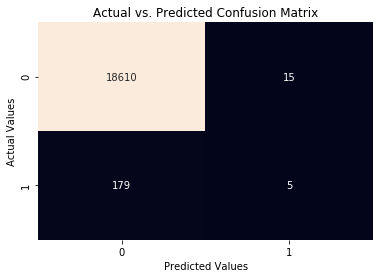

In [110]:
conf_mat = create_conf_mat(y_test,y_pred_LR)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()


In [111]:
#Get predicted probabilites
target_probailities_log = LR.predict_proba(x_test)[:,1]

In [112]:
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,target_probailities_log)


* AUC stands for Area under the curve. AUC gives the rate of successful classification by the logistic model. The AUC makes it easy to compare the ROC curve of one model to another. The AUC for the red ROC curve is greater than the AUC for the blue ROC curve.

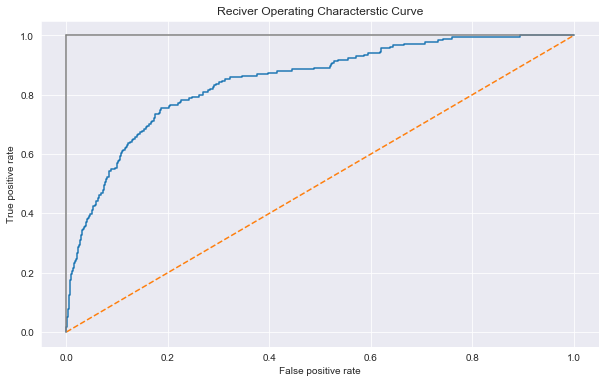

In [113]:
#Plot ROC Curve
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()


 **It illustrates in a binary classifier system the discrimination threshold created by plotting the true positive rate vs false positive rate.**
* As the AUC will only increase if and only if ROC has points on the top left as it conveys that for some threshold the model has high TPR and low FPR.
* So that was about the ROC_AUC curve.
* anything above 0.5 conider as 1 and below 0.5 as 0


## or

In [114]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(x_train, y_train)
ytrain_pred = log_classifier.predict_proba(x_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(x_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.8180876141094768
Logistic test roc-auc: 0.84577910709075


C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [124]:
pred=[]
for model in [log_classifier]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.84577910709075


In [127]:
pd.concat(pred,axis=1)

,0
0,0.004778
1,0.000663
2,0.000292
3,0.000956
4,0.006351
...,...
18804,0.004601
18805,0.002072
18806,0.001025
18807,0.001298


In [128]:
final_prediction

0        0.004778
1        0.000663
2        0.000292
3        0.000956
4        0.006351
           ...   
18804    0.004601
18805    0.002072
18806    0.001025
18807    0.001298
18808    0.039501
Length: 18809, dtype: float64

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.89352244e+00, 8.93522438e-01, 6.62194884e-01, 6.60183179e-01,
       5.76107996e-01, 5.54987084e-01, 5.37235571e-01, 5.17206472e-01,
       4.10438226e-01, 4.02568518e-01, 3.78259525e-01, 3.74576091e-01,
       3.65040279e-01, 3.64883921e-01, 3.11992671e-01, 3.10167785e-01,
       2.35697525e-01, 2.25059045e-01, 2.21201961e-01, 2.20457892e-01,
       2.18993320e-01, 2.18892327e-01, 1.95181326e-01, 1.94323575e-01,
       1.82392178e-01, 1.81380230e-01, 1.75142089e-01, 1.72787798e-01,
       1.69801408e-01, 1.68088292e-01, 1.64053525e-01, 1.63565845e-01,
       1.61269035e-01, 1.59010941e-01, 1.57016618e-01, 1.56337242e-01,
       1.49937337e-01, 1.49761096e-01, 1.47029770e-01, 1.46266282e-01,
       1.43887560e-01, 1.43285592e-01, 1.43094883e-01, 1.42654763e-01,
       1.30962400e-01, 1.30751570e-01, 1.29313201e-01, 1.27268443e-01,
       1.23939224e-01, 1.23870946e-01, 1.20700376e-01, 1.20267518e-01,
       1.17855668e-01, 1.17667996e-01, 1.12569634e-01, 1.10504431e-01,
      

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.appprint('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))end(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

accuracy_ls
Log_ROC_auc = roc_auc_score(y_test, LR.predict(x_test))

In [133]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

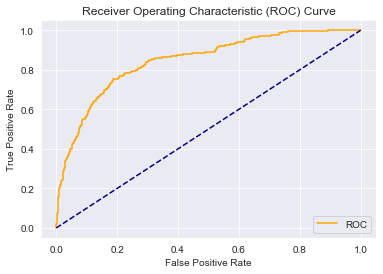

In [134]:
plot_roc_curve(fpr,tpr)
